<a href="https://colab.research.google.com/github/kunal077/Natural-Language-Processing/blob/main/Natural%20Language%20Processing%20Series%20%20/%20TopicModelingWithSVDandNMF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In topic modelling the goal is to find the TOPIC which occurs in a piece of text, for example in a paragraph, we can have multiple words or phrases that can be clubbed together under one TOPIC, so that is TOPIC Modelling, undetstanding what topic is what.

In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
np.set_printoptions(suppress = True)

In [3]:
newsgroups_train = fetch_20newsgroups(subset='train')
print(list(newsgroups_train.target_names))

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [4]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
#We are removing these words so that they do not bother us in overfitting the classifier
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)

In [5]:
newsgroups_train.filenames.shape, newsgroups_train.target.shape

((2034,), (2034,))

In [50]:
print(newsgroups_train.filenames); print()
print(newsgroups_train.target)

['/root/scikit_learn_data/20news_home/20news-bydate-train/comp.graphics/38816'
 '/root/scikit_learn_data/20news_home/20news-bydate-train/talk.religion.misc/83741'
 '/root/scikit_learn_data/20news_home/20news-bydate-train/sci.space/61092'
 ...
 '/root/scikit_learn_data/20news_home/20news-bydate-train/comp.graphics/38737'
 '/root/scikit_learn_data/20news_home/20news-bydate-train/alt.atheism/53237'
 '/root/scikit_learn_data/20news_home/20news-bydate-train/comp.graphics/38269']

[1 3 2 ... 1 0 1]


In [7]:
print(np.array(newsgroups_train.target_names)[newsgroups_train.target[:10]])

['comp.graphics' 'talk.religion.misc' 'sci.space' 'alt.atheism'
 'sci.space' 'alt.atheism' 'sci.space' 'comp.graphics' 'sci.space'
 'comp.graphics']


In [8]:
print(newsgroups_train.target[:10])

[1 3 2 0 2 0 2 1 2 1]


In [9]:
#now we set some custom numbers of topic that we want
#There is no truth here, since this is purely a case of 
#Unsupervised Learning, so we set how many topics i want.
num_topics, num_top_words = 6, 8


Stop Words


---

Some extremely common words which would appear to be of little value in helping select documents matching a user need, they are excluded from the vocabulary entirely, These words are called Stop Words.

---

The general trend in IR Systems over time has been from the standard use of quire large stop words lists (200-300) terms in there) to very small stop lists (7-12), now Web Search Engines do not use Stop Lists.

In [10]:
from sklearn.feature_extraction import stop_words
print(len(sorted(list(stop_words.ENGLISH_STOP_WORDS))))
print(sorted(list(stop_words.ENGLISH_STOP_WORDS))[:100])

318
['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both', 'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de', 'describe', 'detail', 'do', 'done', 'down', 'due', 'during', 'each', 'eg', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'fill', 'find', 'fire', 'first', 'five', 'for', 'former']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


Stemming and Lemmatization


---

They both generate the ROOT form of the words.
Lemmatization uses the rules about a language and resulting tokens are all actual words.

Stemming is poor Lemmatization, crude Heuristic that chops the ends of  of words and the resulting tokens may not be actual words, Stemming is faster.

In [11]:
import nltk
nltk.download('wordnet')
#wordnet is an English Dictionary

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [12]:
from nltk import stem
#We are using nltk becuase it has both Lem and Stem
#Spacy only has Lem

In [13]:
wnl = stem.WordNetLemmatizer()
porter = stem.porter.PorterStemmer()

In [14]:
word_list = ['feet', 'foot', 'foots', 'footing']
[wnl.lemmatize(word) for word in word_list]

['foot', 'foot', 'foot', 'footing']

In [15]:
[porter.stem(word) for word in word_list]

['feet', 'foot', 'foot', 'foot']

In [16]:
word_list = ['organize', 'organizes', 'organizing']
word_list2 = ['universe', 'university']
print([wnl.lemmatize(word) for word in word_list])
print([porter.stem(word) for word in word_list])
print([wnl.lemmatize(word) for word in word_list2])
print([porter.stem(word) for word in word_list2])
#Lemmatizing makes more sense as compared to Stemming
#More morphological languages are better for Lemmatization and Stemming

['organize', 'organizes', 'organizing']
['organ', 'organ', 'organ']
['universe', 'university']
['univers', 'univers']


In [17]:
import spacy
nlp = spacy.load('en_core_web_sm')
inSpacy = nlp.Defaults.stop_words - stop_words.ENGLISH_STOP_WORDS
inSklearn = stop_words.ENGLISH_STOP_WORDS - nlp.Defaults.stop_words
print(inSpacy, "\n", inSklearn)

{'make', 'quite', 'really', "n't", '’re', 'various', '’ve', 'n’t', "'m", '‘s', 'did', 'n‘t', 'regarding', "'ve", 'doing', '‘ll', '‘re', "'ll", 'using', '‘m', '’d', 'say', 'used', 'does', 'just', "'re", 'ca', '’s', '‘ve', 'unless', "'s", '‘d', '’ll', "'d", '’m'} 
 frozenset({'ie', 'inc', 'un', 'co', 'couldnt', 'eg', 'thin', 'system', 'etc', 'hasnt', 'interest', 'cant', 'amoungst', 'ltd', 'found', 'mill', 'sincere', 'thick', 'fire', 'de', 'detail', 'fill', 'con', 'cry', 'bill', 'describe', 'find'})


In [18]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
from nltk import word_tokenize

class LemmaTokenizer(object):
  def __init__ (self):
    self.wnl = stem.WordNetLemmatizer()
  
  def __call__ (self, doc):
    return [self.wnl.Lemmatize(t) for t in word_tokenize(doc)]

In [25]:
vectorizer = CountVectorizer(stop_words='english')
tokenizer = LemmaTokenizer()

In [85]:
vectors = vectorizer.fit_transform(newsgroups_train.data).todense()
print(vectors.shape, vectorizer.get_feature_names())
print(vectors)

(2034, 26576) ['00', '000', '0000', '00000', '000000', '000005102000', '000062david42', '0001', '000100255pixel', '00041032', '0004136', '0004246', '0004422', '00044513', '0004847546', '0005', '0007', '00090711', '000usd', '0012', '001200201pixel', '0018', '00196', '0020', '0022', '0028', '0029', '0033', '0034', '0038', '0049', '006', '0065', '0094', '0098', '00index', '00pm', '01', '0100', '013846', '01752', '0179', '01821', '01826', '0184', '01852', '01854', '01890', '018b', '0195', '0199', '01a', '02', '020', '0200', '020359', '020637', '02115', '02138', '02139', '02154', '02178', '0223', '0235', '023b', '0245', '03', '030', '0300', '03051', '0330', '034', '034101', '04', '040', '040286', '0410', '04110', '041493003715', '0418', '045', '04g', '05', '050', '0500', '050524', '0511', '05402', '05446', '0545', '054589e', '058', '06', '060', '0605', '06111', '06179397', '06487', '0649', '067', '0674', '068', '0695', '07', '070', '071', '0729', '0739', '074', '07410', '07653', '077', '08'

In [38]:
vocab = np.array(vectorizer.get_feature_names())
print(vocab)

['00' '000' '0000' ... 'zware' 'zwarte' 'zyxel']


In [39]:
vocab.shape
print(len(vocab))

26576


In [48]:
vocab[:]

array(['00', '000', '0000', ..., 'zware', 'zwarte', 'zyxel'], dtype='<U80')

Singular Value Decomposition

---

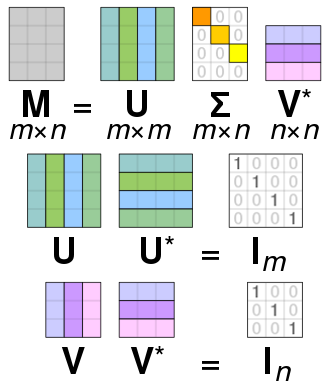



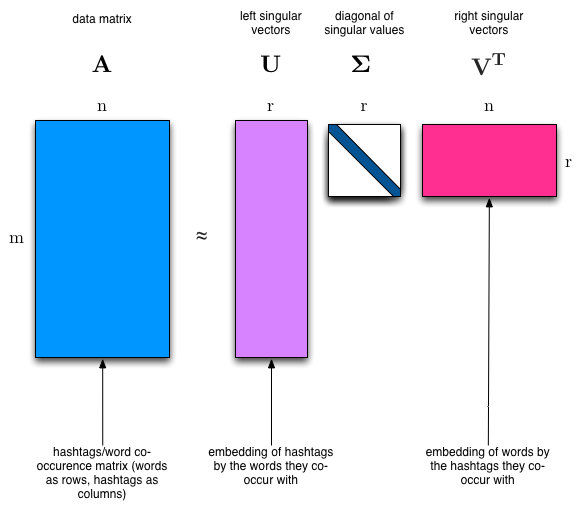


SVD Algorithm factorizes a MATRIX into one matrix with ORTHOGONAL COLUMNS and one with ORTHOGONAL ROWS (they are not normalized yet, (there magnitudes are not equal to 1) and additionaly there will be one DIAGONAL MATRIX, which contains the relative importance of each factor.


Topic Modelling

---

Each topic will have some words in it, so a cluster named TOPIC(K) would have N(K) number of words in it that are related. We expect TOPICS Vector to be orthogonal, otherwise there wouldn't be any difference between topics




In [43]:
%time U, s, vh = linalg.svd(vectors, full_matrices=False) 
Vh = vh

In [46]:
print(U.shape, s.shape, Vh.shape)

(2034, 2034) (2034,) (2034, 26576)


In [57]:
#Reconstruction of U, s, Vh
reconstructed_vectors = U @ np.diag(s) @ Vh
print(np.linalg.norm(reconstructed_vectors - vectors))
print(np.allclose(reconstructed_vectors, vectors))
#Close means whether they are elementwise equal with
#Some tolerance in them, we can see the value 3^-12 
print(U)

3.0400650552378934e-12
True
[[-0.00477991  0.00271988 -0.00121236 ... -0.         -0.
  -0.        ]
 [-0.0002213  -0.00017499 -0.00107815 ...  0.         -0.
  -0.        ]
 [-0.00063693 -0.00074229 -0.00083183 ...  0.          0.
   0.        ]
 ...
 [-0.00138527 -0.00073518 -0.00023316 ...  0.         -0.
   0.        ]
 [-0.00217183  0.00068095 -0.00956545 ... -0.         -0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [60]:
#This means that ROWS are orthonormal
#COLUMNS are orthonormal
print(np.allclose(U.T @ U, np.eye(U.shape[0])))
print(np.allclose(Vh @ Vh.T, np.eye(Vh.shape[0])))

True
True


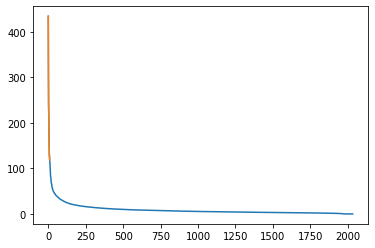

7.361461700633454e-16


In [67]:
import matplotlib.pyplot as plt
plt.plot(s)
#Singular values tells us the importance of each topics in it
plt.plot(s[:10])
plt.show()
print(reconstructed_vectors[0][100])

In [ ]:
print(np.argsort())

In [76]:
#Now let see what the words are
def show_topics(a):
  """
  Input: function takes matrix Vh, U 
  Output: returns the top-most (largest) appearing
          words depending upon t
  """
  #top_words is an anonymous function in t : so that it can be further passed as function
  top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
  topic_words = ([top_words(t) for t in a])
  return [','.join(t) for t in topic_words]

In [84]:
print(len(show_topics(Vh[:])))
print(show_topics(Vh[:]))

print(len(show_topics(U[:])))
print(show_topics(U[:]))

#More the amount of related top - appearing words
#More we can confidently say about the Topic to which it belongs to

2034
['ditto,critus,propagandist,surname,galacticentric,kindergarten,surreal,imaginative', 'jpeg,gif,file,color,quality,image,jfif,format', 'graphics,edu,pub,mail,128,3d,ray,ftp', 'jesus,god,matthew,people,atheists,atheism,does,graphics', 'image,data,processing,analysis,software,available,tools,display', 'god,atheists,atheism,religious,believe,religion,argument,true', 'space,nasa,lunar,mars,probe,moon,missions,probes', 'image,probe,surface,lunar,mars,probes,moon,orbit', 'argument,fallacy,conclusion,example,true,ad,argumentum,premises', 'space,larson,image,theory,universe,physical,nasa,material', 'larson,theory,universe,physical,den,p2,p3,p1', 'den,p2,p3,p1,radius,p12,p23,p13', 'judas,hanging,reply,db,mr,decenso,greek,death', 'atheists,atheism,religious,people,religion,prophecy,matthew,messiah', 'space,graphics,people,like,sgi,research,package,society', 'telescope,word,national,observatory,satellite,atheists,infrared,prefix', 'people,like,nasa,don,think,just,time,gay', 'ra,space,atheist

We get topics that match the kinds of clusers we would expect, This is despite the act that this is an unsupervised algorithm.


---

SVD - For factoring a matrix into Orthogonal Rows and Orthogonal Columns


---
Non Negative Matrix Factorization (NMF)




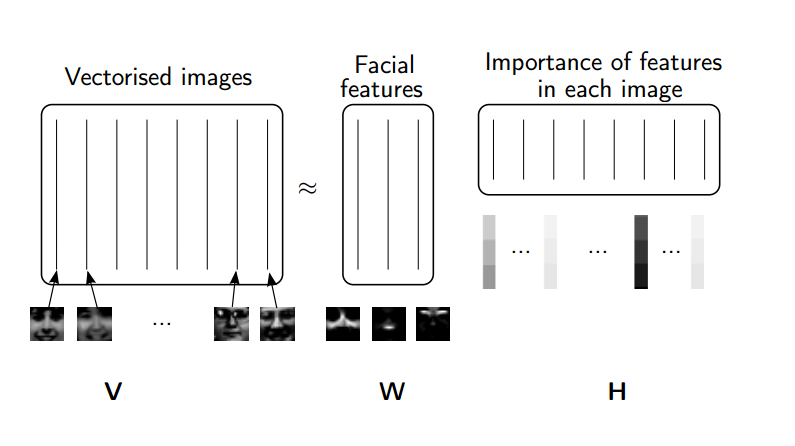



In [101]:
m, n = vectors.shape
print(m, n)

#Hyperparameter - Number of Topics that I want to divide into
d=5
clf = decomposition.NMF(n_components=d, random_state=1)

2034 26576


In [102]:
W1 = clf.fit_transform(vectors)
H1 = clf.components_

In [103]:
print(W1, "\n", H1)

[[0.08858936 0.02984714 0.         0.04220515 0.        ]
 [0.         0.00074146 0.0037713  0.02133068 0.00096886]
 [0.         0.01650813 0.00026615 0.02582674 0.00294897]
 ...
 [0.00897787 0.03011237 0.0033981  0.01453643 0.00331353]
 [0.01862327 0.         0.00123129 0.21812662 0.        ]
 [0.         0.         0.         0.         0.        ]] 
 [[0.12126083 0.         0.         ... 0.00003202 0.00006403 0.00028996]
 [0.11928575 0.12085267 0.00016592 ... 0.0001165  0.000233   0.05186412]
 [0.05766391 0.48160644 0.0007993  ... 0.00028762 0.00057525 0.        ]
 [0.         0.14794335 0.         ... 0.00006585 0.0001317  0.        ]
 [0.12742192 0.19356417 0.00050472 ... 0.         0.         0.        ]]


In [104]:
show_topics(H1)

['jpeg,image,gif,file,color,images,format,quality',
 'edu,graphics,pub,mail,128,ray,ftp,send',
 'space,launch,satellite,nasa,commercial,satellites,year,market',
 'jesus,god,people,matthew,atheists,does,atheism,said',
 'image,data,available,software,processing,ftp,edu,analysis']

Topic Frequency - Inverse Document Frequency (TF-IDF)


---

Way to normalize term counts by taking into account how often they appear in a document, how long the document and how common or rate the term is.

TF = (# of occurence  of term T in a documen) / (# of words in docuements)

IDF = log(# of documents / # documents with term t in it)

In [105]:
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf = vectorizer_tfidf.fit_transform(newsgroups_train.data)

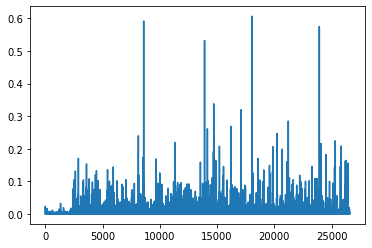

In [110]:
W1 = clf.fit_transform(vectors_tfidf)
H1 = clf.components_

show_topics(H1)
plt.plot(clf.components_[0])
plt.show()

In [111]:
clf.reconstruction_err_

43.712926057952785

We have Randomized_SVDs and Facebook PCA for doing SVD also.